In [ ]:
s#loading data from kaggle api
# !kaggle competitions download -c mitsui-commodity-prediction-challenge

In [ ]:
#unzipping data
# !unzip mitsui-commodity-prediction-challenge.zip

In [ ]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('seaborn-v0_8-darkgrid')
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
# 2. Load Data
target_pairs = pd.read_csv("../data/target_pairs.csv")
train_labels = pd.read_csv("../data/train_labels.csv")
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
test_labels_lag_1 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_1.csv")
test_labels_lag_2 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_2.csv")
test_labels_lag_3 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_3.csv")
test_labels_lag_4 = pd.read_csv("../data/lagged_test_labels/test_labels_lag_4.csv")

In [ ]:
# setting base date and conversion of dates

base_date = pd.Timestamp("2000-01-01")
train['date_id'] = pd.to_timedelta(train['date_id'], unit='D') + base_date
train_labels['date_id'] = pd.to_timedelta(train_labels['date_id'], unit='D') + base_date

In [ ]:
EXCHANGES = ["LME","JPX","US","FX"]
LME = []
JPX = []
US = []
FX = []
for i in train.columns:
  # print(i)
    if i.startswith(EXCHANGES[0]):
        LME.append(i)
    elif i.startswith(EXCHANGES[1]):
        JPX.append(i)
    elif i.startswith(EXCHANGES[2]):
        US.append(i)
    elif i.startswith(EXCHANGES[3]):
        FX.append(i)

In [ ]:
LME

['LME_AH_Close', 'LME_CA_Close', 'LME_PB_Close', 'LME_ZS_Close']

In [ ]:
JPX

['JPX_Gold_Mini_Futures_Open',
 'JPX_Gold_Rolling-Spot_Futures_Open',
 'JPX_Gold_Standard_Futures_Open',
 'JPX_Platinum_Mini_Futures_Open',
 'JPX_Platinum_Standard_Futures_Open',
 'JPX_RSS3_Rubber_Futures_Open',
 'JPX_Gold_Mini_Futures_High',
 'JPX_Gold_Rolling-Spot_Futures_High',
 'JPX_Gold_Standard_Futures_High',
 'JPX_Platinum_Mini_Futures_High',
 'JPX_Platinum_Standard_Futures_High',
 'JPX_RSS3_Rubber_Futures_High',
 'JPX_Gold_Mini_Futures_Low',
 'JPX_Gold_Rolling-Spot_Futures_Low',
 'JPX_Gold_Standard_Futures_Low',
 'JPX_Platinum_Mini_Futures_Low',
 'JPX_Platinum_Standard_Futures_Low',
 'JPX_RSS3_Rubber_Futures_Low',
 'JPX_Gold_Mini_Futures_Close',
 'JPX_Gold_Rolling-Spot_Futures_Close',
 'JPX_Gold_Standard_Futures_Close',
 'JPX_Platinum_Mini_Futures_Close',
 'JPX_Platinum_Standard_Futures_Close',
 'JPX_RSS3_Rubber_Futures_Close',
 'JPX_Gold_Mini_Futures_Volume',
 'JPX_Gold_Rolling-Spot_Futures_Volume',
 'JPX_Gold_Standard_Futures_Volume',
 'JPX_Platinum_Mini_Futures_Volume',
 'JP

In [ ]:
for i in JPX:
  if i.startswith("JPX_Gold_Mini_Futures"):
    print(i)

JPX_Gold_Mini_Futures_Open
JPX_Gold_Mini_Futures_High
JPX_Gold_Mini_Futures_Low
JPX_Gold_Mini_Futures_Close
JPX_Gold_Mini_Futures_Volume
JPX_Gold_Mini_Futures_settlement_price
JPX_Gold_Mini_Futures_open_interest


In [ ]:
for i in JPX:
  if i.startswith("JPX_Gold_Rolling-Spot_Futures"):
    print(i)

JPX_Gold_Rolling-Spot_Futures_Open
JPX_Gold_Rolling-Spot_Futures_High
JPX_Gold_Rolling-Spot_Futures_Low
JPX_Gold_Rolling-Spot_Futures_Close
JPX_Gold_Rolling-Spot_Futures_Volume
JPX_Gold_Rolling-Spot_Futures_settlement_price
JPX_Gold_Rolling-Spot_Futures_open_interest


In [ ]:
for i in JPX:
  if i.startswith("JPX_Gold_Standard_Futures"):
    print(i)

JPX_Gold_Standard_Futures_Open
JPX_Gold_Standard_Futures_High
JPX_Gold_Standard_Futures_Low
JPX_Gold_Standard_Futures_Close
JPX_Gold_Standard_Futures_Volume
JPX_Gold_Standard_Futures_open_interest


In [ ]:
for i in JPX:
  if i.startswith("JPX_Platinum_Mini_Futures"):
    print(i)

JPX_Platinum_Mini_Futures_Open
JPX_Platinum_Mini_Futures_High
JPX_Platinum_Mini_Futures_Low
JPX_Platinum_Mini_Futures_Close
JPX_Platinum_Mini_Futures_Volume
JPX_Platinum_Mini_Futures_settlement_price
JPX_Platinum_Mini_Futures_open_interest


In [ ]:
for i in JPX:
  if i.startswith("JPX_Platinum_Standard_Futures"):
    print(i)

JPX_Platinum_Standard_Futures_Open
JPX_Platinum_Standard_Futures_High
JPX_Platinum_Standard_Futures_Low
JPX_Platinum_Standard_Futures_Close
JPX_Platinum_Standard_Futures_Volume
JPX_Platinum_Standard_Futures_open_interest


In [ ]:
for i in JPX:
  if i.startswith("JPX_RSS3_Rubber_Futures"):
    print(i)

JPX_RSS3_Rubber_Futures_Open
JPX_RSS3_Rubber_Futures_High
JPX_RSS3_Rubber_Futures_Low
JPX_RSS3_Rubber_Futures_Close
JPX_RSS3_Rubber_Futures_Volume
JPX_RSS3_Rubber_Futures_settlement_price
JPX_RSS3_Rubber_Futures_open_interest


US

In [ ]:
for i in US:
  print(i)

US_Stock_ACWI_adj_open
US_Stock_AEM_adj_open
US_Stock_AG_adj_open
US_Stock_AGG_adj_open
US_Stock_ALB_adj_open
US_Stock_AMP_adj_open
US_Stock_BCS_adj_open
US_Stock_BKR_adj_open
US_Stock_BND_adj_open
US_Stock_BNDX_adj_open
US_Stock_BP_adj_open
US_Stock_BSV_adj_open
US_Stock_CAT_adj_open
US_Stock_CCJ_adj_open
US_Stock_CLF_adj_open
US_Stock_COP_adj_open
US_Stock_CVE_adj_open
US_Stock_CVX_adj_open
US_Stock_DE_adj_open
US_Stock_DVN_adj_open
US_Stock_EEM_adj_open
US_Stock_EFA_adj_open
US_Stock_EMB_adj_open
US_Stock_ENB_adj_open
US_Stock_EOG_adj_open
US_Stock_EWJ_adj_open
US_Stock_EWT_adj_open
US_Stock_EWY_adj_open
US_Stock_EWZ_adj_open
US_Stock_FCX_adj_open
US_Stock_FNV_adj_open
US_Stock_FXI_adj_open
US_Stock_GDX_adj_open
US_Stock_GDXJ_adj_open
US_Stock_GLD_adj_open
US_Stock_GOLD_adj_open
US_Stock_HAL_adj_open
US_Stock_HES_adj_open
US_Stock_HL_adj_open
US_Stock_IAU_adj_open
US_Stock_IEF_adj_open
US_Stock_IEMG_adj_open
US_Stock_IGSB_adj_open
US_Stock_JNK_adj_open
US_Stock_KGC_adj_open
US_Stock

In [ ]:
US_Stocks = [i.removeprefix("US_Stock_").removesuffix("_adj_open") for i in US if i.endswith("_adj_open")]
US_Stocks_Columns = ["open","high","low","close","volume"]

In [ ]:
US_Stocks_Columns

['open', 'high', 'low', 'close', 'volume']

In [ ]:
US_Stocks

['ACWI',
 'AEM',
 'AG',
 'AGG',
 'ALB',
 'AMP',
 'BCS',
 'BKR',
 'BND',
 'BNDX',
 'BP',
 'BSV',
 'CAT',
 'CCJ',
 'CLF',
 'COP',
 'CVE',
 'CVX',
 'DE',
 'DVN',
 'EEM',
 'EFA',
 'EMB',
 'ENB',
 'EOG',
 'EWJ',
 'EWT',
 'EWY',
 'EWZ',
 'FCX',
 'FNV',
 'FXI',
 'GDX',
 'GDXJ',
 'GLD',
 'GOLD',
 'HAL',
 'HES',
 'HL',
 'IAU',
 'IEF',
 'IEMG',
 'IGSB',
 'JNK',
 'KGC',
 'KMI',
 'LQD',
 'LYB',
 'MBB',
 'MPC',
 'MS',
 'NEM',
 'NUE',
 'NUGT',
 'OIH',
 'OKE',
 'OXY',
 'PAAS',
 'RIO',
 'RSP',
 'RY',
 'SCCO',
 'SHEL',
 'SHY',
 'SLB',
 'SLV',
 'SPIB',
 'SPTL',
 'SPYV',
 'STLD',
 'TD',
 'TECK',
 'TIP',
 'TRGP',
 'URA',
 'VALE',
 'VCIT',
 'VCSH',
 'VEA',
 'VGIT',
 'VGK',
 'VGLT',
 'VGSH',
 'VT',
 'VTV',
 'VWO',
 'VXUS',
 'VYM',
 'WMB',
 'WPM',
 'X',
 'XLB',
 'XLE',
 'XOM',
 'YINN']

FX

In [ ]:
for i in FX:
  print(i)

FX_AUDJPY
FX_AUDUSD
FX_CADJPY
FX_CHFJPY
FX_EURAUD
FX_EURGBP
FX_EURJPY
FX_EURUSD
FX_GBPAUD
FX_GBPJPY
FX_GBPUSD
FX_NZDJPY
FX_NZDUSD
FX_USDCHF
FX_USDJPY
FX_ZARJPY
FX_ZARUSD
FX_NOKUSD
FX_NOKEUR
FX_CADUSD
FX_AUDNZD
FX_EURCHF
FX_EURCAD
FX_AUDCAD
FX_GBPCHF
FX_EURNZD
FX_AUDCHF
FX_GBPNZD
FX_GBPCAD
FX_CADCHF
FX_NZDCAD
FX_NZDCHF
FX_ZAREUR
FX_NOKGBP
FX_NOKCHF
FX_ZARCHF
FX_NOKJPY
FX_ZARGBP


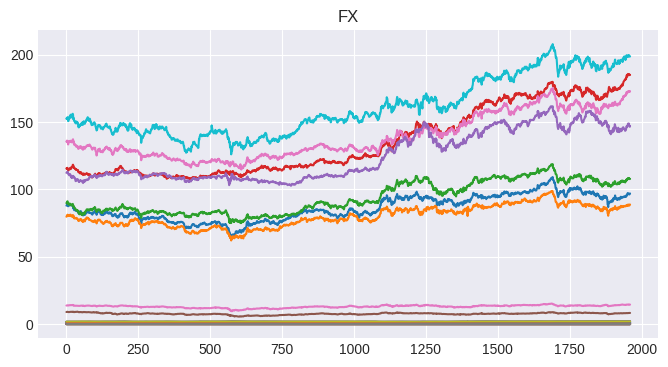

In [ ]:
from matplotlib import pyplot as plt
for i in FX:
  train[i].plot(kind='line', figsize=(8, 4), title="FX", legend=False)
  plt.gca().spines[['top', 'right']].set_visible(False)

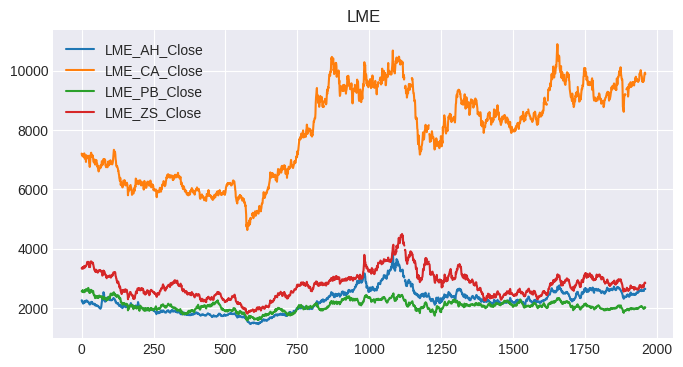

In [ ]:
for i in LME:
  train[i].plot(kind='line', figsize=(8, 4), title="LME", legend=True)
  plt.gca().spines[['top', 'right']].set_visible(False)

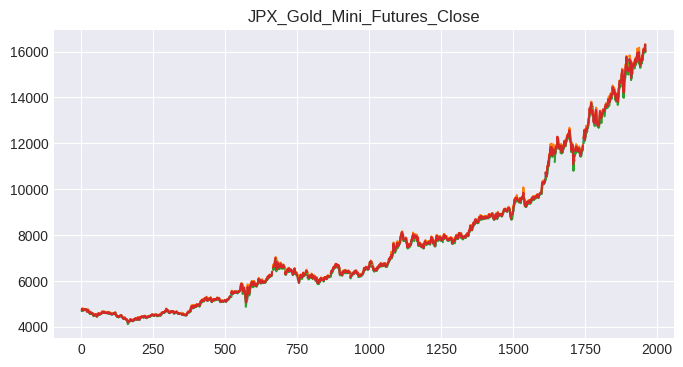

In [ ]:
train["JPX_Gold_Mini_Futures_Open"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Mini_Futures_Open", legend=False)
train["JPX_Gold_Mini_Futures_High"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Mini_Futures_High", legend=False)
train["JPX_Gold_Mini_Futures_Low"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Mini_Futures_Low", legend=False)
train["JPX_Gold_Mini_Futures_Close"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Mini_Futures_Close", legend=False)
plt.gca().spines[['top', 'right']].set_visible(False)

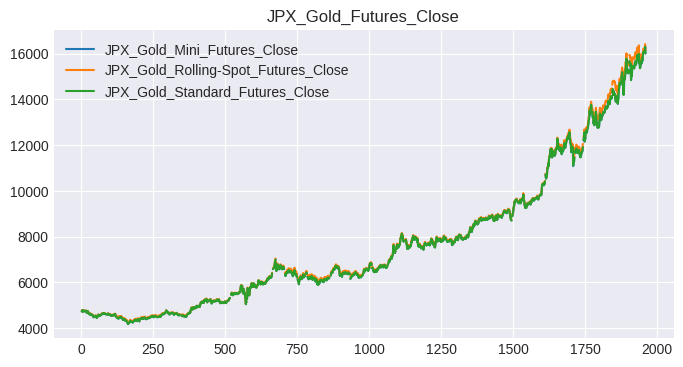

In [ ]:
train["JPX_Gold_Mini_Futures_Close"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Mini_Futures_Close", legend=True)
train["JPX_Gold_Rolling-Spot_Futures_Close"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Rolling-Spot_Futures_Close", legend=True)
train["JPX_Gold_Standard_Futures_Close"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Futures_Close", legend=True)
plt.gca().spines[['top', 'right']].set_visible(False)

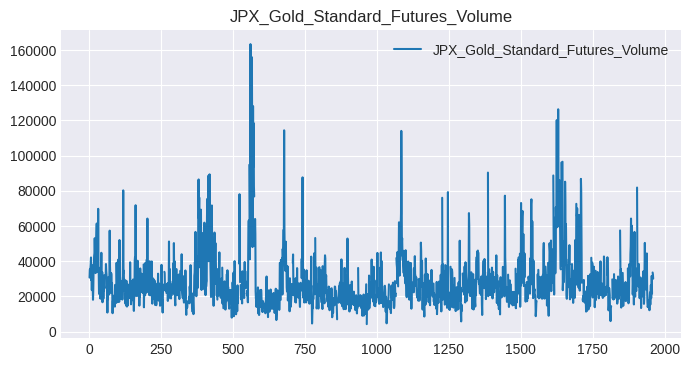

In [ ]:
train["JPX_Gold_Standard_Futures_Volume"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Standard_Futures_Volume", legend=True)
plt.gca().spines[['top', 'right']].set_visible(False)

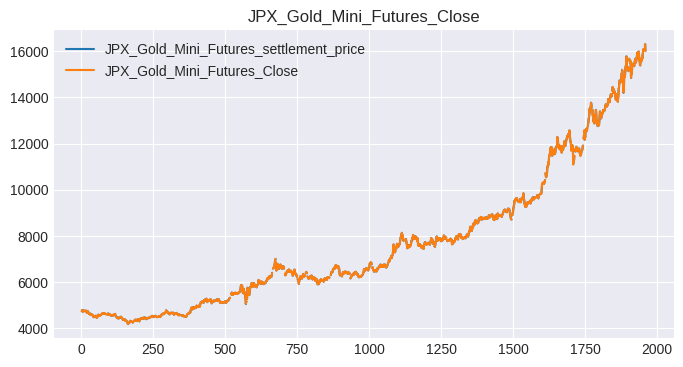

In [ ]:
train["JPX_Gold_Mini_Futures_settlement_price"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Mini_Futures_settlement_price", legend=True)
train["JPX_Gold_Mini_Futures_Close"].plot(kind='line', figsize=(8, 4), title="JPX_Gold_Mini_Futures_Close", legend=True)
plt.gca().spines[['top', 'right']].set_visible(False)

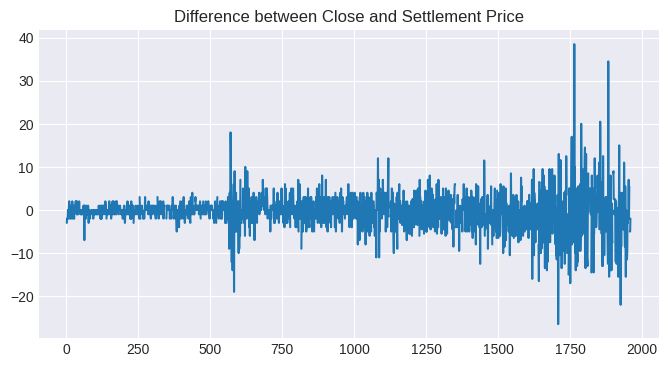

In [ ]:
(train["JPX_Gold_Mini_Futures_Close"] - train["JPX_Gold_Mini_Futures_settlement_price"]).plot(kind='line', figsize=(8, 4), title="Difference between Close and Settlement Price", legend=False)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

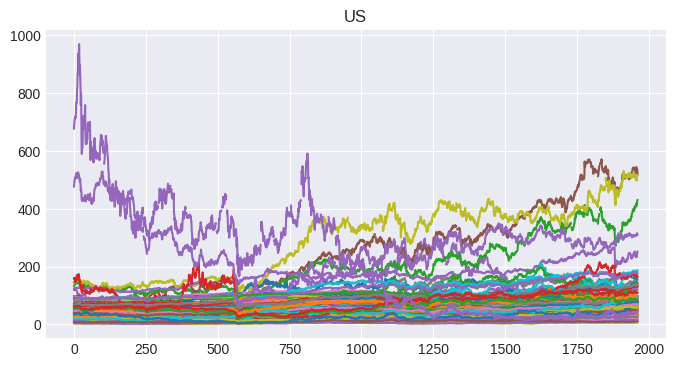

In [ ]:
for i in US:
  if i.endswith("_adj_close"):
    train[i].plot(kind='line', figsize=(8, 4), title="US", legend=False)
    plt.gca().spines[['top', 'right']].set_visible(False)